# Principal component analysis

In this note, we implement a principal component analysis (PCA) algorithm from scratch.<br>
Suppose we have a traning data set with $m$ number of features and $n$ number of traning samples.
The algorithms tries to find highly correlated features from the input data $\mathbf{X}\in\mathbb{R}^{n\times m}$, which are then reduced into a smaller number of features $\mathbf{Z}\in\mathbb{R}^{n\times k}$ with $k<m$.<br>
This involves finding a set of eigen vectors from the feature space. To do so, we first define a covariance matrix,
$$
\mathbf{\Sigma}=\frac{1}{n} \mathbf{X}^T\cdot\mathbf{X},
$$
which is a $(m\times m)$-matrix.<br>
The eigen vectors can be found by invoking the singular value decomposition (SVD),
$$
[\mathbf{U},\mathbf{S},\mathbf{V}]=\mathrm{SVD}(\Sigma),
$$
where $\mathbf{U}$ ($\mathbf{V}$) is the $(m\times m)$ left (right) unitary matrix, each column of which defines an eigen vector, and $\mathbf{S}$ is the singular value matrix, which is diagonal.

The reduced basis vectors can be obtained by taking first $k$ columns from the left unitary matrix $\mathbf{U}$, i.e.,
$\mathbf{U}^\mathrm{reduced}\in \mathbb{R}^{m\times k}$.<br>
The reduced feature space is then given by
$$
\mathbf{Z}=\mathbf{X}\cdot\mathbf{U}^\mathrm{reduced}.
$$
Recovering the original dimensionality can be done by
$$
\mathbf{X}^\mathrm{reduced} = \mathbf{Z}\cdot(\mathbf{U}^\mathrm{reduced})^T.
$$
Note that $\mathbf{X}^\mathrm{reduced}\neq\mathbf{X}$. We have lost information while obtaining $\mathbf{X}^\mathrm{reduced}$ since we discarded $(m-k)$ number of eigen vectors.<br>
In face, we can quantify the amount of information that is lost,
$$
Q = 1- \frac{\sum_i^k S_{ii}}{\sum_i^m S_{ii}}.
$$

One of useful applications of PCA is visualizing data whose dimensionality is larger than 3. In this note, we will reduce a data set that has 10 features into 2 features to visualize it.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [4]:
class PCA():
    def __init__(self,X,k):
        """
        Perform the principal component analysis.
        -------------------------------------------------
        Parameters:
        X: (n,m)-array
           An input data of m features with n data points.
        k: int
           The number of reduces dimensions (or features)
        """
        self.n, self.m = X.shape
        self.k = k
        
    def find_pca(self,X):
        """
        Finding the eigen vectors of the input data.
        ----------------------------------------------------
        Returns:
        U: (n,k)-array
           The eigen vectors
        S: (k)-array
           The singular values 
        """
        Sigma = (X.T @ X)/self.n
        U,S,_ = np.linalg.svd(Sigma)
        return U,S
    
    def projection(self,X,U):
        """
        Projecting the features onto the reduces dimensions
        --------------------------------------------------------
        Returns:
        (k,n)-array
        """
        Ur = U[:,:self.k]
        return X @ Ur
    
    def recover(self,Z,U):
        """
        Recover the projected features from k-dimension to m-dimension.
        --------------------------------------------------------
        Returns:
        (m,n)-array
        """
        Ur = U[:,:self.k]
        return Z @ Ur.T

def feature_scaling(X):
    """
    Scaling the magnitute of features.
    """
    X_mean = np.mean(X,axis = 0)
    X_std  = np.std(X,axis = 0)
    X_norm = (X-X_mean)/X_std
    return X_norm, X_mean, X_std


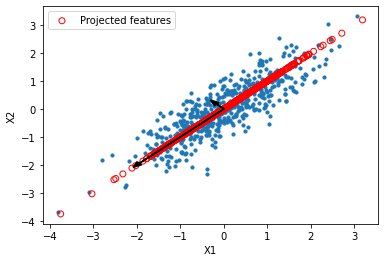

In [5]:
# Generating tutorial data
x1 = np.random.randn(500)
x2 = 1.5*x1 + np.random.randn(500)
X = np.vstack((x1,x2)).T
X_norm,X_mean,X_std = feature_scaling(X)

model = PCA(X_norm,1)
U,S = model.find_pca(X_norm)
Z   = model.projection(X_norm,U)
Xrec = model.recover(Z,U)
plt.figure()
plt.scatter(X_norm[:,0],X_norm[:,1],s=10)
plt.scatter(Xrec[:,0],Xrec[:,1],color='red',label=r'Projected features',facecolors='none')
for i in range(2):
    plt.arrow(X_mean[0], X_mean[1], 1.5 * S[i]*U[0, i], 1.5 * S[i]*U[1, i],
             head_width=0.15, head_length=0.2, fc='k', ec='k', lw=1.5, zorder=1000)
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [6]:
# Visualizing diabetes data
# dia_X.shape : (442, 10), 442 data points with 10 features
dia_X, dia_y = load_diabetes(return_X_y=True)
diX_norm, diX_mean, diX_std = feature_scaling(dia_X)

model = PCA(diX_norm,2)
diU, diS = model.find_pca(diX_norm)
diZ      = model.projection(diX_norm,diU)
diX_rec  = model.recover(diZ,diU)

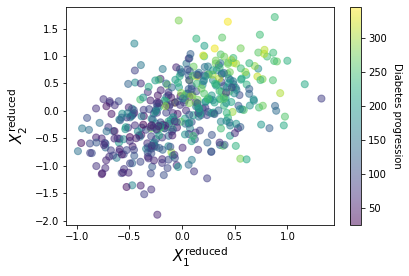

In [7]:
plt.figure()
sc   = plt.scatter(diX_rec[:,0],diX_rec[:,1],s=50,c=dia_y,alpha=0.5)
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Diabetes progression', rotation=270,labelpad=15)
plt.xlabel(r'$X_1^{\mathrm{reduced}}$',size=15)
plt.ylabel(r'$X_2^{\mathrm{reduced}}$',size=15)
plt.show()